In [2]:
import sys  ; sys.path.append("../../codes/")

In [3]:
import healpy as h
from modules import local_eb_kernel as rk
from modules import local_healpix_qu2eb as lh
import timeit

In [4]:
nside=16 ; upnside=nside ; npix=h.nside2npix(upnside)
lmax=3*nside ; lmin=2
ell=arange(lmax+1)

odisc=1.*min(180.,180.*(32./lmax))
print odisc

120.0


In [5]:
cltemp=h.read_cl("../../data/planck_wp_highL_lensing_param.fits")
#cltemp=h.read_cl("../data/cl_rem3.fits")

cl=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0]

random.seed(0) ; tqu=h.synfast(cl,nside,pol=True,new=True,verbose=False)

# Get teb maps from Healpix.
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; teb=h.alm2map(alm,upnside,pol=False,verbose=False)

# Get data power spectrum.
cld=h.alm2cl(alm)

# Get Q/U corresponding to E and B modes.
alm[2][:]=0.0 ; equ=h.alm2map(alm,nside=nside,pol=True,verbose=False)
alm=h.map2alm(tqu,lmax=3*nside,pol=True) ; alm[1][:]=0.0 ; bqu=h.alm2map(alm,nside=nside,pol=True,verbose=False)

fl=ones(3*nside+1,float) ; fl[:lmin+1]=0

ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)

In [20]:
rteb,temp,temp=lh.return_local_eb(tqu,120,nside,3*nside)

In [21]:
clrteb=h.alm2cl(h.map2alm(rteb,lmax=3*nside,pol=False))

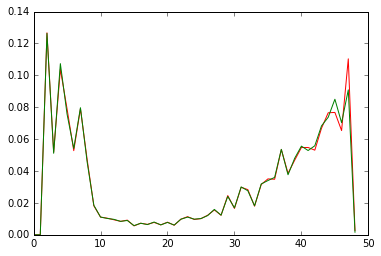

In [22]:
plot(ell,fll*clrteb[1],"r-")
plot(ell,fll*cld[1],"g-")

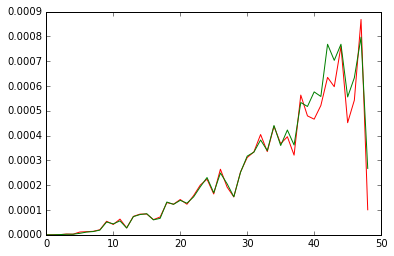

In [23]:
plot(ell,fll*clrteb[2],"r-")
plot(ell,fll*cld[2],"g-")